<a href="https://colab.research.google.com/github/LordMordo/regression_price_predict/blob/master/sk_learn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive/Colab Notebooks/^GSPC.csv"

'/content/drive/My Drive/Colab Notebooks/^GSPC.csv'


In [3]:
# importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn


print("load successful")

load successful


In [4]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/GOOG.csv")
df.set_index("Date",inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,1204.270020,1212.989990,1192.500000,1197.000000,1197.000000,1831000
2018-09-05,1193.800049,1199.010010,1162.000000,1186.479980,1186.479980,2061300
2018-09-06,1186.300049,1186.300049,1152.000000,1171.439941,1171.439941,1888500
2018-09-07,1158.670044,1175.260010,1157.214966,1164.829956,1164.829956,1401300
2018-09-10,1172.189941,1174.540039,1160.109985,1164.640015,1164.640015,1115400


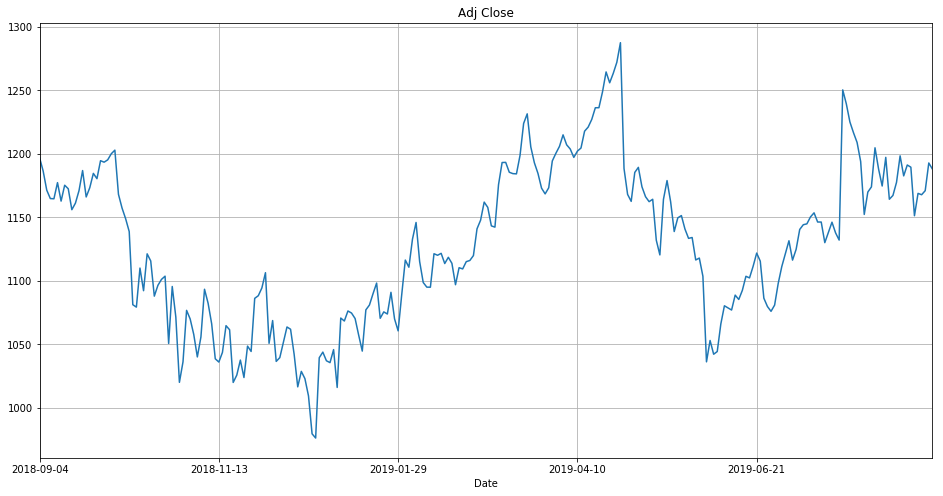

In [5]:
df["Adj Close"].plot(label="Google", figsize=(16,8), title = "Adj Close", grid = True)

In [0]:
window_size = 60 # Allow us to look at 60 days into the past
# Prepare the data so that we have 60 day windows and predict what the next day should be

# Get indices of access for the data
num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [0]:
data = df['Adj Close'].values[indices] # Create the 2D matrix of training samples

In [0]:
X = data[:,:-1] # Each row represents 60 days in the past
y = data[:,-1] # Each output value represents the 61 day

from sklearn import preprocessing
X = preprocessing.scale(X)

In [0]:
# Train and test split
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

In [10]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train,y_train) 
pred1 = reg.predict(X_test)

reg.score(X_test,y_test)



-0.06499422073304295

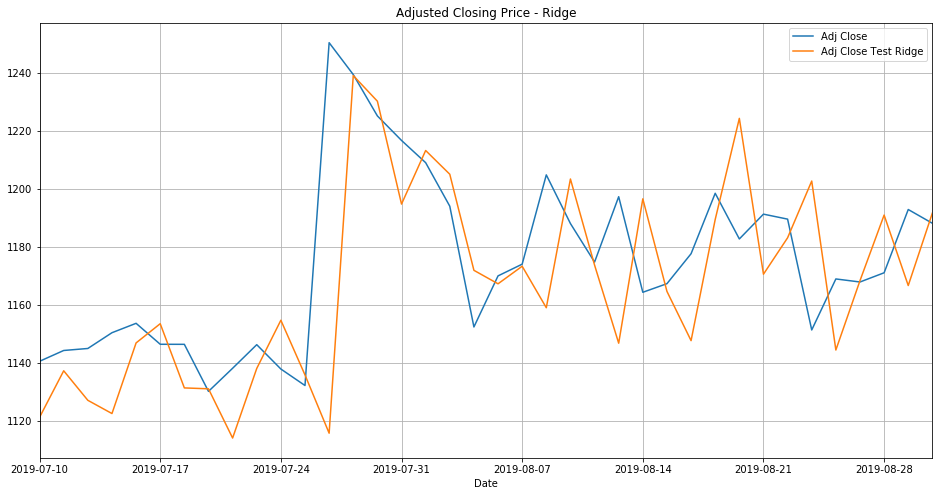

In [11]:
df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[ind_split+window_size:] # Past 60 days we don't know yet
# Add in method
df_test['Adj Close Test Ridge'] = pred1
# Plot the data now
df_test.plot(label='Google', figsize=(16,8), title='Adjusted Closing Price - Ridge', grid=True)

In [12]:
reg2 = linear_model.BayesianRidge()
reg2.fit(X_train, y_train)
pred2 = reg2.predict(X_test)

reg2.score(X_test, y_test)



0.11331494566905531

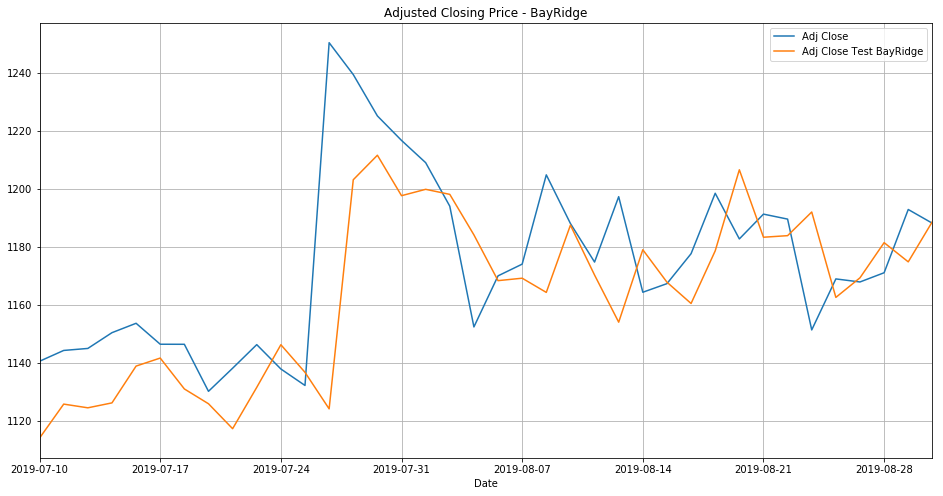

In [13]:
df_test2 = df.copy()
df_test2.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test2 = df_test2.iloc[ind_split+window_size:] # Past 60 days we don't know yet
# Add in method
df_test2['Adj Close Test BayRidge'] = pred2
# Plot the data now
df_test2.plot(label='Google', figsize=(16,8), title='Adjusted Closing Price - BayRidge', grid=True)

In [14]:
reg3 = linear_model.Lasso(alpha=0.1)
reg3.fit(X_train, y_train) 
pred3 = reg3.predict(X_test)

reg3.score(X_test,y_test)



0.08989822090269095

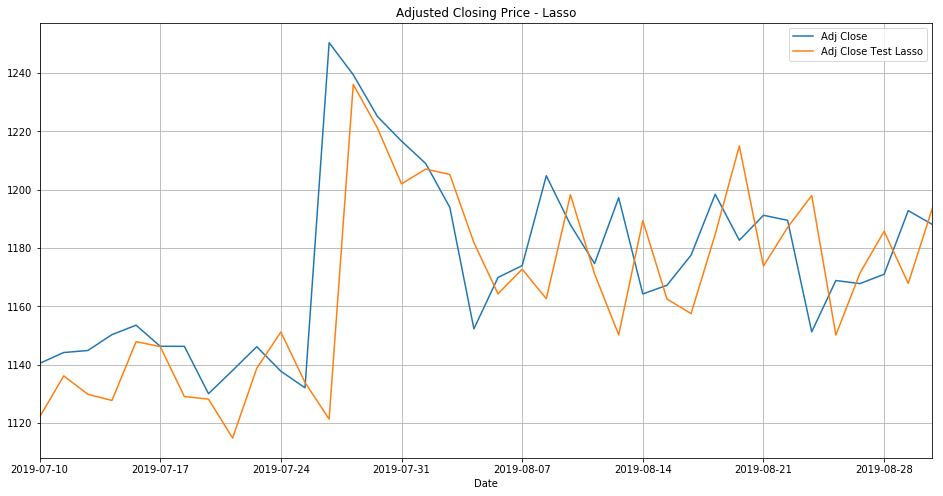

In [15]:
df_test3 = df.copy()
df_test3.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test3 = df_test3.iloc[ind_split+window_size:] # Past 60 days we don't know yet
# Add in method
df_test3['Adj Close Test Lasso'] = pred3
# Plot the data now
df_test3.plot(label='Google', figsize=(16,8), title='Adjusted Closing Price - Lasso', grid=True)

In [16]:
from sklearn import tree

reg4 = tree.DecisionTreeRegressor()
reg4 = reg4.fit(X_train, y_train)
pred4 = reg4.predict(X_test)

reg4.score(X_test, y_test)

-0.6539167793363352

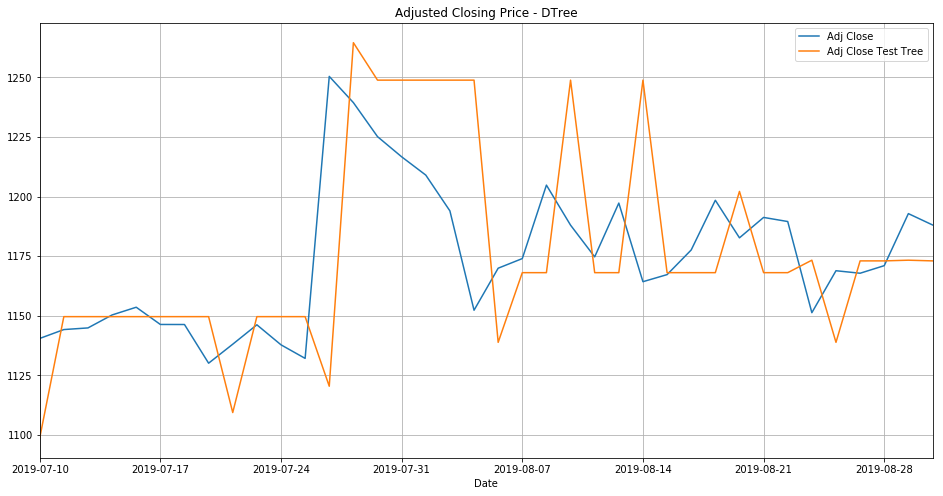

In [17]:
df_test4 = df.copy()
df_test4.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test4 = df_test4.iloc[ind_split+window_size:] # Past 60 days we don't know yet
# Add in method
df_test4['Adj Close Test Tree'] = pred4
# Plot the data now
df_test4.plot(label='Google', figsize=(16,8), title='Adjusted Closing Price - DTree', grid=True)